# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [3]:
df_drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')

### Step 4. Which continent drinks more beer on average?

In [38]:
df_drinks.head()
df_drinks.fillna(value='NA', inplace=True)

In [6]:
df_drinks.sort_values(by = 'beer_servings',ascending = False)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,AF
45,Czech Republic,361,170,134,11.8,EU
62,Gabon,347,98,59,8.9,AF
65,Germany,346,117,175,11.3,EU
98,Lithuania,343,244,56,12.9,EU
...,...,...,...,...,...,...
107,Mauritania,0,0,0,0.0,AF
158,Somalia,0,0,0,0.0,AF
111,Monaco,0,0,0,0.0,EU
128,Pakistan,0,0,0,0.0,AS


In [9]:
df_drinks.reset_index().query('country == "Spain"')

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
160,160,Spain,284,157,112,10.0,EU


### Step 5. For each continent print the statistics for wine consumption.

In [39]:
df_drinks.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [40]:
dfg = df_drinks.groupby(by='continent')

In [41]:
dfg_eu = dfg.get_group('EU')

In [42]:
import matplotlib.pyplot as plt

In [43]:
dfg_eu

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


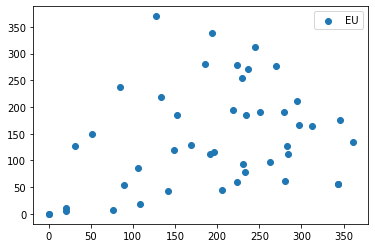

In [44]:
plt.scatter(x = dfg_eu.beer_servings, y = dfg_eu.wine_servings, label = 'EU')
plt.legend()

In [45]:
dfg_af = dfg.get_group('AF')

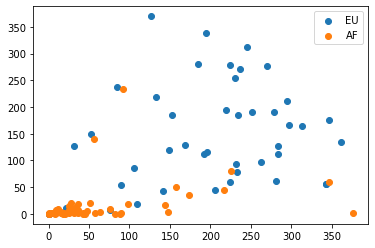

In [46]:
plt.scatter(x = dfg_eu.beer_servings, y = dfg_eu.wine_servings, label = 'EU')
plt.scatter(x = dfg_af.beer_servings, y = dfg_af.wine_servings, label = 'AF')
plt.legend()

In [47]:
juanes = df_drinks.dropna().continent.unique()
juanes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

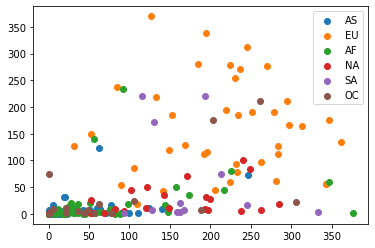

In [48]:
for juan in juanes:
    pepa = dfg.get_group(juan)
    plt.scatter(x = pepa.beer_servings, y = pepa.wine_servings, label = juan)
    plt.legend()

In [50]:
df_drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

### Step 6. Print the mean alcohol consumption per continent for every column

In [51]:
df_drinks.groupby(by='continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [52]:
df_drinks.groupby(by='continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [59]:
df_drinks.groupby('continent').agg({'spirit_servings': ['mean', 'min', 'max']})

spirit_servings         
                     mean min  max
continent                         
AF              16.339623   0  152
AS              60.840909   0  326
EU             132.555556   0  373
NA             165.739130  68  438
OC              58.437500   0  254
SA             114.750000  25  302